In [1]:
import pandas as pd
import duckdb
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# lECTURA DE ARCHIVO DE HETEROEVALUACION HOJA 1 

hetero_parte_1 = duckdb.sql("""
    SELECT *
    FROM 'C:/Users/9 ----- SIG/Downloads/HETEROEVALUACION_sin.xlsx'
""").df() #lectura autoevaluacion parte 1 muy pesado

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [3]:
# LECTURA DE ARCHIVOS

ruta_1 = r"C:\Users\9 ----- SIG\Downloads\AUTOEVALUACION.xlsx" #autoevaluacion
ruta_2 = r"C:\Users\9 ----- SIG\Downloads\HETEROEVALUACION_sin.xlsx" #heteroevaluacion parte 2 

hetero_parte_2 = pd.read_excel(ruta_2, sheet_name = "alex 2")
auto = pd.read_excel(ruta_1)

In [4]:
# UNIR LAS DOS TABLAS DE HETEROEVALUACION 

hetero_unido = pd.concat([hetero_parte_1, hetero_parte_2], ignore_index=True)

In [5]:
# CONVERTIR COLUMNA OPCION O DE CALIFICACION A NUMERICO

hetero_unido["opcion"] = pd.to_numeric(hetero_unido["opcion"], errors="coerce")

In [6]:
# TABLAS DINAMICA AUTOEVALUA

din_auto = pd.pivot_table(
    auto,
    values="opcion",
    index="nombre_quien",
    aggfunc= "mean"
)

din_auto.head(5)

,opcion
nombre_quien,
ADIELA ZAPATA,4.8
ADOLFO PERALTA,5.0
ADOLFO PEREZ,4.9
ADRIANA CEPEDA,4.8
ADRIANA COLORADO,5.0


In [8]:
# CARGAR COMENTARIOS ANÁLIZADOS

ruta = r"C:\Users\9 ----- SIG\Documents\EVALUACION DOCENTE\analisis_de_sentimiento.xlsx"

comentarios = pd.read_excel(ruta)
comentarios["Profesor"] = comentarios["Profesor"].str.upper()
comentarios.head(2)

,Id_profe,Profesor,Comentario,positivo,negativo,neutro,Punto crítico,Indicador
0,103061,RAFAEL TORO,Muy buen profesor,99.5,0.5,0.0,Ninguno detectado,4.97
1,501023,WILLIAN GONGORA,"Aprendí mucho, buen profesor",99.6,0.5,0.0,Ninguno detectado,4.98


## ANÁLISIS DESCRIPTIVO E INFERENCIAL

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


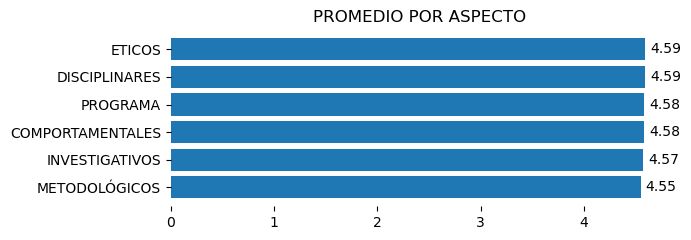

In [9]:
# PROMEDIO POR ASPECTO 

prom_aspecto = hetero_unido.groupby("aspecto")["opcion"].mean().sort_values()
fig, ax = plt.subplots(figsize=(7, 2.5))
bars = ax.barh(prom_aspecto.index, prom_aspecto.values)
# Agregar etiquetas en las barras
for i, v in enumerate(prom_aspecto.values):
    ax.text(v + 0.05, i, f'{v:.2f}', va='center')
plt.title("PROMEDIO POR ASPECTO")
plt.tight_layout()
# quiatr los bordes
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False);

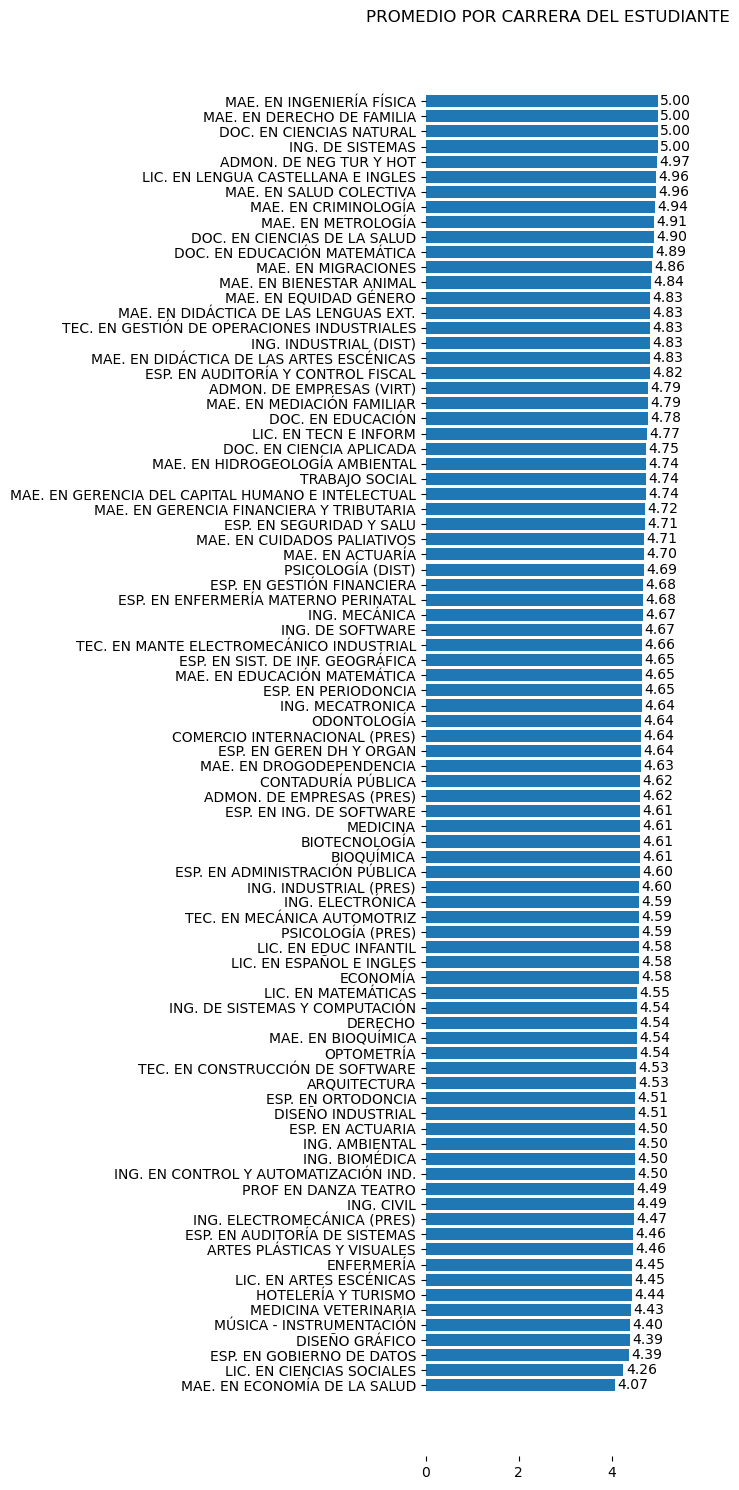

In [10]:
# PROMEDIO POR CARRERA ESTUDIANTE 

prom_aspecto = hetero_unido.groupby("carrera_quien")["opcion"].mean().sort_values()
fig, ax = plt.subplots(figsize=(7, 15))
bars = ax.barh(prom_aspecto.index, prom_aspecto.values)
# Agregar etiquetas en las barras
for i, v in enumerate(prom_aspecto.values):
    ax.text(v + 0.05, i, f'{v:.2f}', va='center')
plt.title("PROMEDIO POR CARRERA DEL ESTUDIANTE")
plt.tight_layout()
# quiatr los bordes
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False);

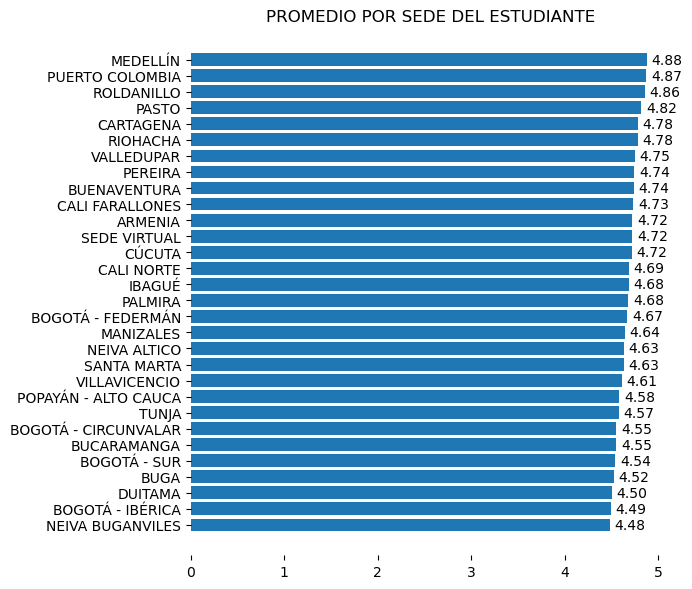

In [11]:
# PROMEDIO POR SEDE ESTUDIANTE

prom_aspecto = hetero_unido.groupby("sede_quien")["opcion"].mean().sort_values()
fig, ax = plt.subplots(figsize=(7, 6))
bars = ax.barh(prom_aspecto.index, prom_aspecto.values)
# Agregar etiquetas en las barras
for i, v in enumerate(prom_aspecto.values):
    ax.text(v + 0.05, i, f'{v:.2f}', va='center')
plt.title("PROMEDIO POR SEDE DEL ESTUDIANTE")
plt.tight_layout()
# quiatr los bordes
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False);

In [12]:
# MÉTRICAS 

prom_hetero = hetero_unido.groupby("nombre_para")["opcion"].mean().round(2) # PROMEDIO HETEROEVALUACION
prom_auto = auto.groupby("nombre_quien")["opcion"].mean() # PROMEDIO DE AUTOEVALUACION
prom_comen = comentarios.groupby("Profesor")["Indicador"].mean().round(2) # PROMEDIO COMENTARIOS
std_hetero = hetero_unido.groupby("nombre_para")["opcion"].std().round(2) # DESVIACION PARA HETEROEVALUACION

In [13]:
# UNIFIRCAR METRICAS POR DOCENTE

indicarores = pd.concat([prom_hetero, prom_auto,prom_comen, std_hetero], axis=1)
indicarores.columns = ["prom_heteroeva_sin_comen","autoeval","prom_comentarios","desviacion"]
indicarores["diferencia"] = round(((indicarores["prom_heteroeva_sin_comen"] - indicarores["autoeval"]) / indicarores["autoeval"]) * 100,1)
indicarores["nota final"] = round((prom_comen * 0.2) + (prom_hetero * 0.8),2)

In [14]:
# AGREGAR CUARTILES A LOS DATOS

# Calcular los quartiles
q1 = indicarores['prom_heteroeva_sin_comen'].quantile(0.25)
q2 = indicarores['prom_heteroeva_sin_comen'].quantile(0.50)
q3 = indicarores['prom_heteroeva_sin_comen'].quantile(0.75)

# Crear una función para asignar el quartil

def asignar_quartil(promedio):
    if promedio <= q1:
        return 'Q1'
    elif promedio <= q2:
        return 'Q2'
    elif promedio <= q3:
        return 'Q3'
    else:
        return 'Q4'

# Aplicar la función a cada fila
indicarores['Quartil'] = indicarores['prom_heteroeva_sin_comen'].apply(asignar_quartil)
indicarores['Comentarios_analizados'] = comentarios.groupby("Profesor")["Profesor"].count()
indicarores.head(5)

,prom_heteroeva_sin_comen,autoeval,prom_comentarios,desviacion,diferencia,nota final,Quartil,Comentarios_analizados
ADIELA ZAPATA,4.84,4.8,4.93,0.40,0.8,4.86,Q4,23.0
ADOLFO PERALTA,4.55,5.0,4.38,0.81,-9.0,4.52,Q2,13.0
ADOLFO PEREZ,4.91,4.9,4.85,0.33,0.2,4.90,Q4,10.0
ADRIANA CEPEDA,4.64,4.8,4.08,0.80,-3.3,4.53,Q2,46.0
ADRIANA COLORADO,4.89,5.0,4.82,0.32,-2.2,4.88,Q4,12.0


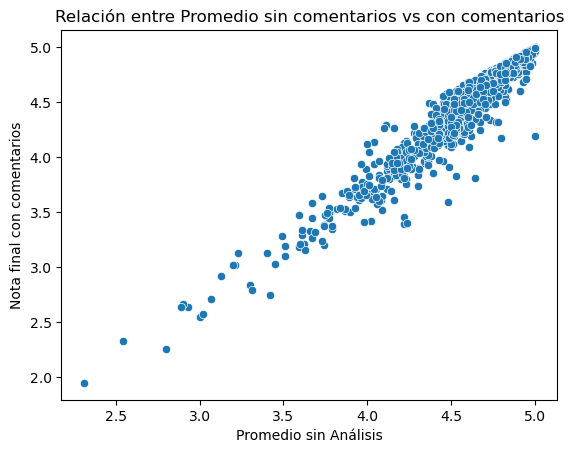

In [15]:
# CORRELACION ENTRE PROMEDIO SIN ANALISIS DE SENTIMIENTOS Y CON ANÁLISIS

sns.scatterplot(data=indicarores, x='prom_heteroeva_sin_comen', y='nota final')
plt.title("Relación entre Promedio sin comentarios vs con comentarios")
plt.xlabel("Promedio sin Análisis")
plt.ylabel("Nota final con comentarios");

In [16]:
# CORRELACION 

indicarores[["prom_heteroeva_sin_comen", "nota final"]].corr()	

,prom_heteroeva_sin_comen,nota final
prom_heteroeva_sin_comen,1.000000,0.962658
nota final,0.962658,1.000000


## DOCENTES FOCO

In [17]:
# Definición de los umbrales

UMBRAL_HETERO_BAJA = 4.0
UMBRAL_DIFERENCIA = -0.10  # Representa -10%. Valores menores a -0.10 (ej: -0.20) indican mayor sobrestimación
UMBRAL_STD = 0.80

# Creación del DataFrame de Foco aplicando los tres filtros (Triple Alerta)
df_foco_riesgo = indicarores[
    (indicarores['nota final'] < UMBRAL_HETERO_BAJA) &
    (indicarores['diferencia'] < UMBRAL_DIFERENCIA) &
    (indicarores['desviacion'] > UMBRAL_STD)
]

# Imprimir el resultado
print(f"Número de docentes de TRIPLE ALERTA: {len(df_foco_riesgo)}")
df_foco_riesgo.head(5)

Número de docentes de TRIPLE ALERTA: 134


,prom_heteroeva_sin_comen,autoeval,prom_comentarios,desviacion,diferencia,nota final,Quartil,Comentarios_analizados
ADRIANA FLOREZ,3.78,5.0,2.36,1.57,-24.4,3.50,Q1,2.0
ADRIANA ORTIZ,4.34,4.7,2.37,0.89,-7.7,3.95,Q1,17.0
ALBA PICO,3.90,5.0,1.92,1.44,-22.0,3.50,Q1,20.0
ALEJANDRO GUARNIZO,4.34,4.5,2.44,1.13,-3.6,3.96,Q1,44.0
ALEXANDER OREJUELA,4.09,4.9,1.25,0.95,-16.5,3.52,Q1,26.0


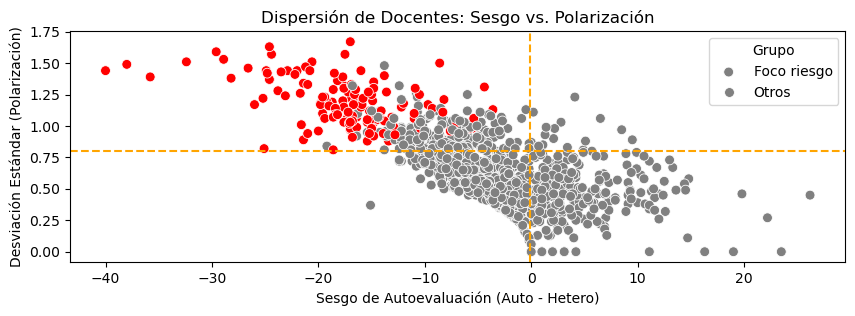

In [18]:
# Crear una columna de etiqueta para el color (1 si es foco, 0 si no lo es)
indicarores['ES_FOCO'] = indicarores.index.isin(df_foco_riesgo.index).astype(int)

plt.figure(figsize=(10, 3))
sns.scatterplot(
    data=indicarores,
    x='diferencia',
    y='desviacion',
    hue='ES_FOCO',
    size='ES_FOCO',
    sizes=(50, 50),
    palette={0: 'gray', 1: 'red'} # Rojo para el foco, gris para el resto
)

# Añadir líneas de umbral para referencia
plt.axvline(x=UMBRAL_DIFERENCIA, color='orange', linestyle='--')
plt.axhline(y=UMBRAL_STD, color='orange', linestyle='--')

plt.title('Dispersión de Docentes: Sesgo vs. Polarización')
plt.xlabel('Sesgo de Autoevaluación (Auto - Hetero)')
plt.ylabel('Desviación Estándar (Polarización)')
plt.legend(title='Grupo', labels=['Foco riesgo', 'Otros']);

In [19]:
# VER COMENTARIOS DE LOS DOCENTES FOCO

# Crear la máscara
mascara = comentarios["Profesor"].isin(df_foco_riesgo.index)

# Filtrar negativos
comentarios_filtrados_docentes_foco = comentarios[mascara]
comentarios_filtrados_docentes_foco = comentarios_filtrados_docentes_foco[comentarios_filtrados_docentes_foco["negativo"] > 30]
pd.set_option('display.max_colwidth', None)
comentarios_filtrados_docentes_foco['Comentarios_analizados'] = comentarios_filtrados_docentes_foco.groupby("Profesor")["Profesor"].transform('count')
comentarios_filtrados_docentes_foco.sort_values(by = "negativo", ascending = False).head(6)

,Id_profe,Profesor,Comentario,positivo,negativo,neutro,Punto crítico,Indicador,Comentarios_analizados
4639,502040,IVAN BUITRAGO,"Es un profesor muy prepotente, nos hablaba como si fuéramos menos, no dictaba las clases con entusiasmo cuando uno le pedía algo su respuesta era"" pues no vuelva"" muy decepcionado de los docentes que se contratan",0.2,98.6,1.2,"Es un profesor muy prepotente, nos hablaba como si fuéramos menos, no dictaba las clases con entusiasmo cuando uno le pedía algo su respuesta era"" pues no vuelva"" muy decepcionado de los docentes que se contratan",0.01,15
1770,103075,JULIAN PRADO,"El doctor Julián Prado muy mal profesor, no tenía manejo de ningún tema que nos dio durante los 3 cortes que nos dio clase, nunca sabía qué responder, no sabe formular preguntas, es una persona que responde mal a sus estudiantes y crea un mal ambiente. Mu",0.3,98.6,1.2,"El doctor Julián Prado muy mal profesor, no tenía manejo de ningún tema que nos dio durante los 3 cortes que nos dio clase, nunca sabía qué responder, no sabe formular preguntas, es una persona que responde mal a sus estudiantes y crea un mal ambiente. Mu",0.02,30
236,501906,ROCIO DE DIEGO,"Es una de las peores docentes con las que me he cruzado a lo largo de mi vida académica, totalmente déspota, pedante, grosera, no tiene madera de docente, no atiende a nuestras preguntas, es bastante arrogante y nunca dio una buena clase, se lo hicimos sa",0.3,98.6,1.1,"Es una de las peores docentes con las que me he cruzado a lo largo de mi vida académica, totalmente déspota, pedante, grosera, no tiene madera de docente, no atiende a nuestras preguntas, es bastante arrogante y nunca dio una buena clase, se lo hicimos sa",0.02,48
12127,306763,ZULMA MORENO,"Es la peor docente, no tiene objetividad, le gusta que le lamban para ser buena gente, no es imparcial, le gusta hacer sufrir a los estudiantes, no tiene corazón, es increíble como disfruta del sufrimiento ajeno! No sabe ser docente",0.3,98.6,1.1,"Es la peor docente, no tiene objetividad, le gusta que le lamban para ser buena gente, no es imparcial, le gusta hacer sufrir a los estudiantes, no tiene corazón, es increíble como disfruta del sufrimiento ajeno! No sabe ser docente",0.02,14
6468,500850,GUSTAVO JAIMES,"Muy mal docente es grosero, responde siempre de manera grosera, tiene preferencias y los estudiantes que les cae mal les hace imposible pasar la materia, muy insatisfecho con su forma de enseñar y su forma de ser",0.3,98.5,1.2,"Muy mal docente es grosero, responde siempre de manera grosera, tiene preferencias y los estudiantes que les cae mal les hace imposible pasar la materia, muy insatisfecho con su forma de enseñar y su forma de ser",0.02,9
14465,403511,DAVID TRUJILLO,"Además de que se maneja una metodología poco efectiva por parte del profesor, el ambiente en el aula de clase es pesado. El profesor no se dirige respetuosamente a sus estudiantes y permite las faltas de respeto entre sus estudiantes. Es desalentador",0.2,98.5,1.3,"Además de que se maneja una metodología poco efectiva por parte del profesor, el ambiente en el aula de clase es pesado. El profesor no se dirige respetuosamente a sus estudiantes y permite las faltas de respeto entre sus estudiantes. Es desalentador",0.01,15


In [20]:
ruta_d = r"C:\Users\9 ----- SIG\Documents\EVALUACION DOCENTE\comentarios_docentes_foco.xlsx"
comentarios_filtrados_docentes_foco.to_excel(ruta_d, index = False)

## PRUEBAS DE HIPOTESIS DE LAS DOS MEDIAS

In [28]:
# CREAR DF SIN DOCENTES FOCO

no_foco = indicarores[indicarores['ES_FOCO'] == 0]['nota final']
df_foco_riesgo = df_foco_riesgo["nota final"]

KeyError: 'nota final'

In [36]:
no_foco = no_foco.dropna()
df_foco_riesgo = df_foco_riesgo.dropna()

In [37]:
from scipy.stats import ttest_ind

# Aplicar t-test
t_stat, p_valor = ttest_ind(no_foco, df_foco_riesgo)
print(f"t-estadistica: {t_stat}, p-valor: {p_valor}")

# Interpretación del p-valor
if p_valor < 0.05:
    print("Hay una diferencia estadísticamente significativa.")
else:
    print("No hay suficiente evidencia, la diferencia es producto del azar.")

t-estadistica: 28.810612053658357, p-valor: 2.1918294649000469e-141
Hay una diferencia estadísticamente significativa.
